# Image classification

### Import required libraries

In [26]:
import os
import numpy as np
import tensorflow as tf     
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


In [ ]:
# configure GPU
# os.environ['TF_XLA_FLAGS'] = 'tf_xla_enable_xla_devices'

### Load DataSet

In [25]:
train_size = 0.8
test_size = 0.2

# initial dataset
y_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# combine into one
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

# divide to test and train
x_train = x[:int(len(x) * train_size)]
x_test = x[-int(len(x) * test_size):]
y_train = y[:int(len(y) * train_size)]
y_test = y[-int(len(y) * test_size):]

# normalize dataset
x_train = x_train / 255
x_test = x_test / 255

# test
y_train.shape

(48000, 1)

### Observe Dataset

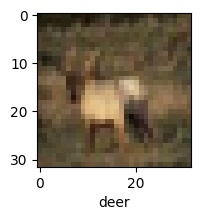

In [4]:
def showImage(x, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(y_classes[y[index]])

showImage(x_train, y_train.reshape(-1,), 3)

### Build and Compile model

In [41]:
activation = 'relu'
loss = 'sparse_categorical_crossentropy'
optimizer = 'adam'

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation = activation, input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(4, 4), activation= activation))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=34, activation= activation))
model.add(Dense(units=10, activation='softmax'))

model.compile(
  optimizer = optimizer,
  loss = loss,
  metrics = ['accuracy']
)

### Train model

In [42]:
epochs = 10
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs)

Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.5769 - accuracy: 0.4296 - val_loss: 1.3258 - val_accuracy: 0.5253
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.2801 - accuracy: 0.5424 - val_loss: 1.2404 - val_accuracy: 0.5606
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.1812 - accuracy: 0.5827 - val_loss: 1.1921 - val_accuracy: 0.5726
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 1.0992 - accuracy: 0.6131 - val_loss: 1.1302 - val_accuracy: 0.5978
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 1.0390 - accuracy: 0.6381 - val_loss: 1.1022 - val_accuracy: 0.6118
Epoch 6/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.9876 - accuracy: 0.6566 - val_loss: 1.0879 - val_accuracy: 0.6227
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.9503 - accuracy: 0.6693 - val_loss: 1.0733 - val_accuracy:

### Vizualize training results

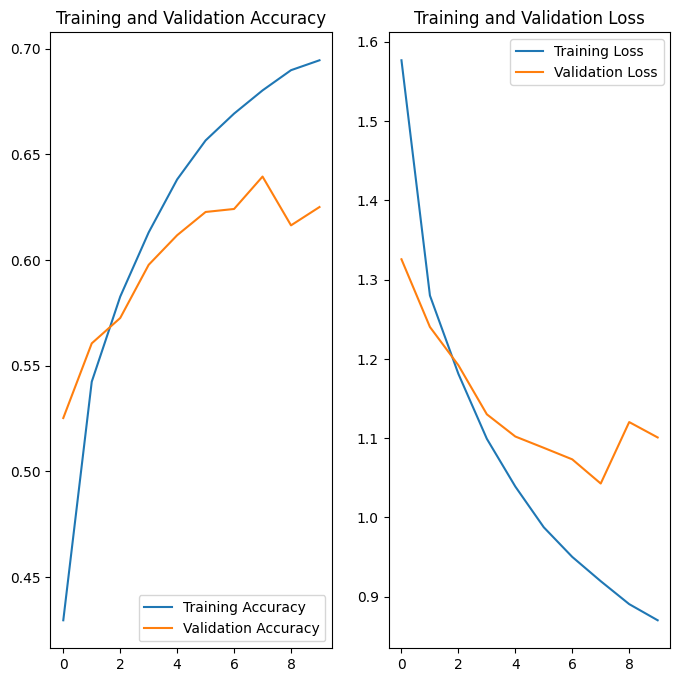

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Make predictions

 38/375 [==>...........................] - ETA: 0s

2022-11-28 15:08:35.889289: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 147456000 exceeds 10% of free system memory.


375/375 [==============================] - 1s 3ms/step
Predicted class:  automobile


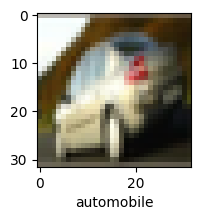

In [8]:
y_predictions = model.predict(x_test)
y_predictions = [np.argmax(arr) for arr in y_predictions]
showImage(x_test, y_test.reshape(-1, ), 0)
print('Predicted class: ', y_classes[y_predictions[0]])


### Print confusion matrix

In [10]:
tf.math.confusion_matrix(y_test, y_predictions)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 830,    6,   79,   23,   16,    6,    6,   14,  187,   30],
       [  48,  837,    8,   23,    4,    3,   13,    8,  112,  146],
       [  82,    5,  710,   77,  128,   49,   59,   35,   31,   11],
       [  26,    9,  130,  609,  126,  154,   71,   34,   41,   14],
       [  32,    1,  112,   53,  818,   18,   42,   60,   33,    3],
       [  23,    1,  134,  302,   79,  540,   27,   59,   24,    9],
       [   4,    4,   90,   78,   79,   17,  897,    7,   19,    9],
       [  28,    0,   60,   48,  114,   56,    8,  858,   12,   17],
       [  50,   15,   14,   15,    6,    5,    2,    5, 1088,   15],
       [  50,   58,   11,   38,   10,    4,   10,   23,   95,  911]],
      dtype=int32)>